In [1]:
# 路透社新闻分类：单标签多分类

# 打开数据集
# numpy 1.17 版本与keras兼容有问题,需要设置 allow_pickle = True
import numpy as np
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)

from keras.datasets import reuters
# 加载数据,保留前1W最常见的单词
# 设置 path 以便使用本地文件
# label中 0 ~ 45 个分类标签
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(path = "reuters.npz", num_words = 10000)

# 还原 numpy 设置
np.load = old

Using TensorFlow backend.


In [2]:
# 准备数据,将训练数据向量化
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension)) # 0矩阵
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 训练、测试数据向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
# 验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]


In [3]:
# 将训练数据标签 one-hot 编码
# 不使用 tensorflow.keras 中方法
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [4]:
# 构建网络
#from keras import models
#from keras import layers
# tensorflow 2.0 版本,需要如下写法
from tensorflow.keras import models
from tensorflow.keras import layers

# 层设置
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'sigmoid'))

# 编译模型
# 也可以使用类方式
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])


In [5]:
# 训练模型
# 512 个样本一批,迭代训练 20 轮次(partial_x_train全量数据迭代 20 次)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 171us/sample - loss: 3.2958 - accuracy: 0.5048 - val_loss: 2.7431 - val_accuracy: 0.5520
Epoch 2/20
7982/7982 [==============================] - 0s 42us/sample - loss: 2.2550 - accuracy: 0.5727 - val_loss: 1.7306 - val_accuracy: 0.6410
Epoch 3/20
7982/7982 [==============================] - 0s 42us/sample - loss: 1.3417 - accuracy: 0.7171 - val_loss: 1.2631 - val_accuracy: 0.7320
Epoch 4/20
7982/7982 [==============================] - 0s 41us/sample - loss: 0.9467 - accuracy: 0.8088 - val_loss: 1.0806 - val_accuracy: 0.7860
Epoch 5/20
7982/7982 [==============================] - 0s 42us/sample - loss: 0.7342 - accuracy: 0.8507 - val_loss: 0.9973 - val_accuracy: 0.8030
Epoch 6/20
7982/7982 [==============================] - 0s 42us/sample - loss: 0.6011 - accuracy: 0.8789 - val_loss: 1.0154 - val_accuracy: 0.7970
Epoch 7/20
7982/7982 [==============================] - 0s 42us/sampl

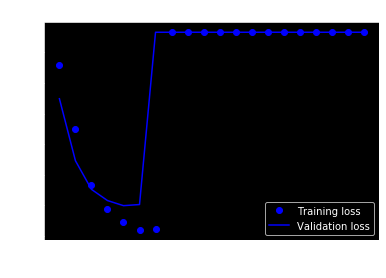

In [6]:
# 绘制训练损失和验证损失
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

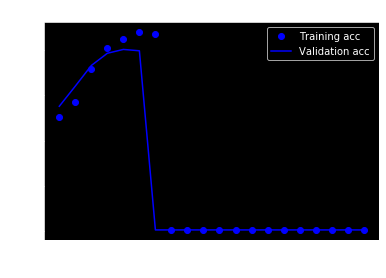

In [7]:
# 绘制训练精度和验证精度
plt.clf() #清空图像

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.show()